#  Softmax


In [7]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.6 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 13.7 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 9.2 MB/s  eta 0:00:01
  Using cached zipp-3.17.0-py3-none-any.whl (7.4 kB)
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
# import libraries
import numpy as np
import torch
import torch.nn as nn       #neural networks
import matplotlib.pyplot as plt

In [ ]:
# "manually" in numpy

# the list of numbers
z = [1,2,3]

# compute the softmax result
num = np.exp(z) #exponent
den = np.sum( np.exp(z) ) 
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[ 3 14  9 13  5  3 13 -5 14 -4 -5 -5 14 -4 -1 10  5  8 -1 -3  3  7 -1  1
 -1]


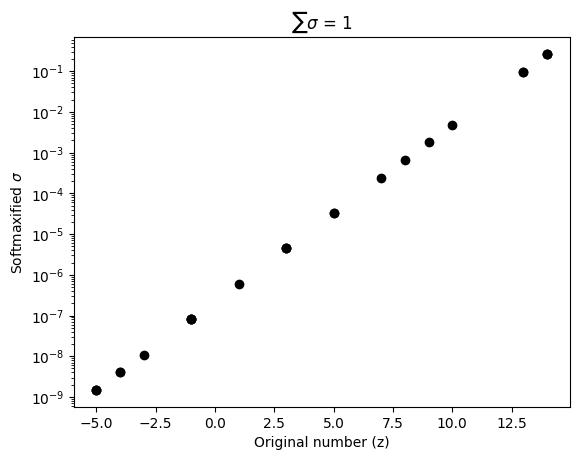

In [13]:
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

# Using pytorch

In [14]:
# slightly more involved using torch.nn

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)

tensor([4.4366e-06, 2.6564e-01, 1.7899e-03, 9.7723e-02, 3.2782e-05, 4.4366e-06,
        9.7723e-02, 1.4883e-09, 2.6564e-01, 4.0457e-09, 1.4883e-09, 1.4883e-09,
        2.6564e-01, 4.0457e-09, 8.1260e-08, 4.8654e-03, 3.2782e-05, 6.5845e-04,
        8.1260e-08, 1.0997e-08, 4.4366e-06, 2.4223e-04, 8.1260e-08, 6.0043e-07,
        8.1260e-08])


In [16]:
type(torch.Tensor(z))

torch.Tensor

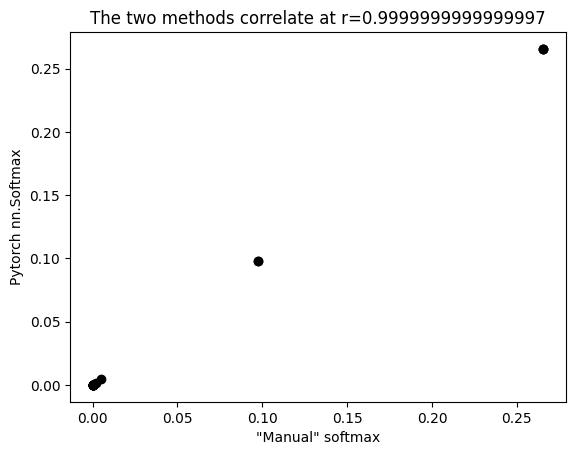

In [17]:
# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()